In [1]:
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from sklearn.cluster import KMeans
'''

In [20]:
#kmeans clustering 
df =pd.read_csv('kmeanstutorial.csv')

In [21]:
df= df[['team','type','location','pass_end_location']]

In [22]:
df = df[(df['team']=='France')&(df['type']=='Pass')].reset_index() ## get france from team column, get pass from type column

In [23]:
df.head()

,index,team,type,location,pass_end_location
0,11,France,Pass,"[48.0, 50.0]","[48.0, 60.0]"
1,24,France,Pass,"[49.0, 80.0]","[46.0, 61.0]"
2,25,France,Pass,"[65.0, 64.0]","[66.0, 69.0]"
3,28,France,Pass,"[63.0, 73.0]","[65.0, 79.0]"
4,29,France,Pass,"[58.0, 79.0]","[26.0, 69.0]"


In [24]:
df[['x','y']] = df.location.str.split(expand=True) #separate the location values into xy 
df[['endX','endY']] = df.pass_end_location.str.split(expand=True) # split pass_end_location column


In [25]:
#formatting
df['x'] = df.loc[:,'x'] = df.x.map(lambda i: i[1:-1]).astype(float) #first to the very last one
df['y'] = df.loc[:,'y'] = df.y.map(lambda i: i[0:-1]).astype(float)
df['endX'] = df.loc[:,'endX'] = df.endX.map(lambda x: x[1:-1]).astype(float)
df['endY'] = df.loc[:,'endY'] = df.endY.map(lambda x: x[0:-1]).astype(float)
df = df.drop(['location','pass_end_location'],axis=1) #column names, not rows 
df

,index,team,type,x,y,endX,endY
0,11,France,Pass,48.0,50.0,48.0,60.0
1,24,France,Pass,49.0,80.0,46.0,61.0
2,25,France,Pass,65.0,64.0,66.0,69.0
3,28,France,Pass,63.0,73.0,65.0,79.0
4,29,France,Pass,58.0,79.0,26.0,69.0
...,...,...,...,...,...,...,...
287,837,France,Pass,34.0,47.0,36.0,42.0
288,842,France,Pass,15.0,79.0,63.0,79.0
289,845,France,Pass,70.0,58.0,97.0,66.0
290,847,France,Pass,31.0,61.0,68.0,80.0


In [26]:
ry = np.array(df[['x','y','endX','endY']]) 
kmeans = KMeans(n_clusters = 10,random_state=100) #same result for random_state, if changes the results change
kmeans.fit(ry)
df['cluster'] = kmeans.predict(ry)

In [27]:
df.cluster.value_counts()

8    39
6    38
1    36
3    36
0    31
2    28
5    27
9    24
7    18
4    15
Name: cluster, dtype: int64

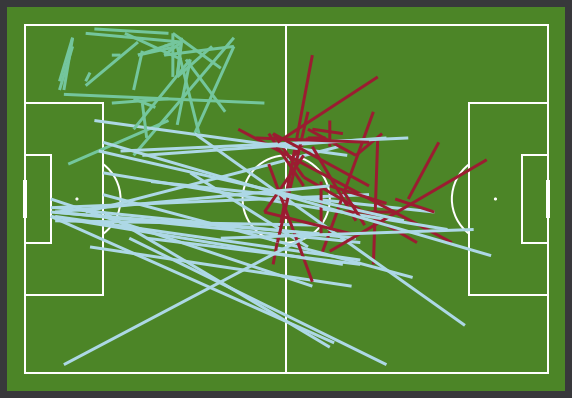

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('#38383b')
ax.patch.set_facecolor('#38383b')

pitch = Pitch(pitch_type='statsbomb',orientation='horizontal',
             pitch_color='#4c8527',line_color='white',figsize=(10,10),
             constrained_layout=False,tight_layout=True,view='full')

pitch.draw(ax=ax)

for x in range(len(df['cluster'])):
    
    if df['cluster'][x] ==0:
        pitch.lines(xstart=df['x'][x],ystart=df['y'][x],xend=df['endX'][x],yend=df['endY'][x],
                   color='#74c69d',lw=3,zorder=2,ax=ax)

    if df['cluster'][x] ==2:
        pitch.lines(xstart=df['x'][x],ystart=df['y'][x],xend=df['endX'][x],yend=df['endY'][x],
                   color='#9b1c31',lw=3,zorder=2,ax=ax)
      
    
    if df['cluster'][x] ==5:
        pitch.lines(xstart=df['x'][x],ystart=df['y'][x],xend=df['endX'][x],yend=df['endY'][x],
                   color='#add8e6',lw=3,zorder=2,ax=ax)